In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
#download cat dog dataset
# !curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
# !unzip -q kagglecatsanddogs_3367a.zip
# !ls

In [11]:
!ls PetImages

Cat  Dog


In [12]:
#Filter out corrupted images
import os
num_skipped = 0
for folder_name in ("Cat","Dog"):
    folder_path = os.path.join("PetImages",folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath,"rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped +=1
            os.remove(fpath)
print("Deleted %d images" % num_skipped)

Deleted 0 images


In [13]:
image_size = (180,180)
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"PetImages",
validation_split=0.2,
subset="training",
seed=1337,
image_size = image_size,
batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"PetImages",
validation_split=0.2,
subset="validation",
seed=1337,
image_size = image_size,
batch_size = batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [14]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

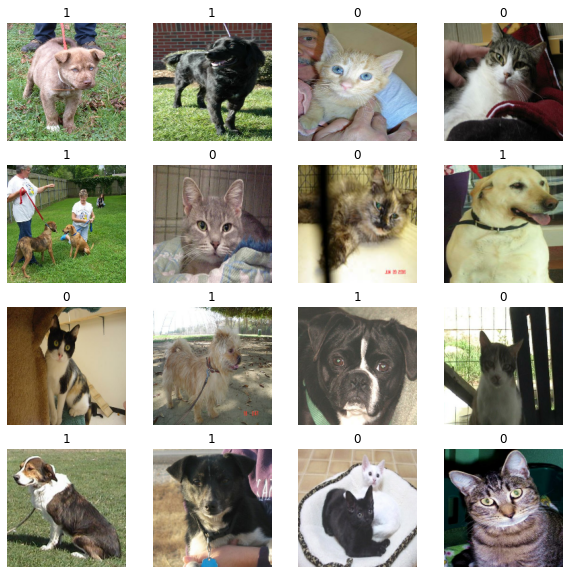

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4 ,4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [16]:
#Using image data augmentation
data_augmentation = keras.Sequential(
[
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

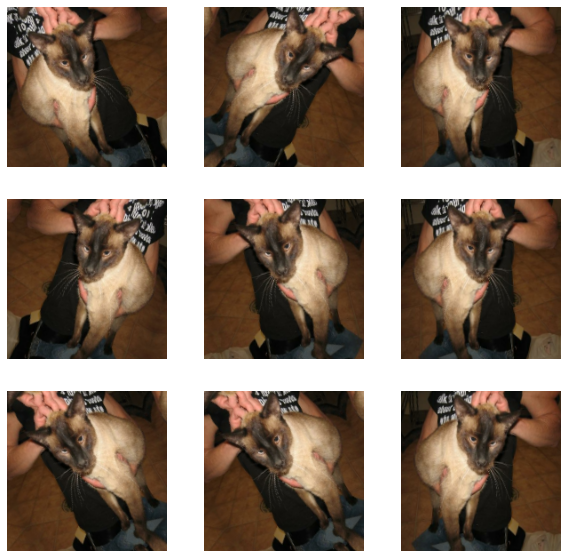

In [17]:
#Let's visualize what the augmented samples look like, 
#by applying data_augmentation repeatedly to the first image in the dataset:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [19]:
#Standardizing the data
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)